# TOPSIS

In [3]:
import pandas as pd
import numpy as np

In [4]:
def topsis(df: pd.DataFrame, wts: np.ndarray, impact: np.ndarray) -> pd.DataFrame:
    mat = np.array(df.iloc[:, 1:])
    rows, cols = mat.shape
    
    # mat / rootOfSumOfSquare * weight
    for i in range(cols):
        temp = 0
        for j in range(rows):
            temp += mat[j][i] ** 2
        temp = temp**0.5
        wts[i] /= temp
    
    weightedNormalized = mat * wts
   
    idealBestWorst = []  # (best,worst)

    for i in range(cols):
        maxi = weightedNormalized[:, i].max()
        mini = weightedNormalized[:, i].min()
        idealBestWorst.append((maxi, mini) if impact[i] == 1 else (mini, maxi))
    topsisScore = []
    for i in range(rows):
        temp_p, temp_n = 0, 0
        for j in range(cols):
            temp_p += (weightedNormalized[i][j] - idealBestWorst[j][0]) ** 2
            temp_n += (weightedNormalized[i][j] - idealBestWorst[j][1]) ** 2
        temp_p, temp_n = temp_p**0.5, temp_n**0.5
        # print(temp_p,temp_n)
        topsisScore.append(temp_n / (temp_p + temp_n))

    df["score"] = np.array(topsisScore).T
    df["rank"] = df["score"].rank(method="max", ascending=False)
    df["rank"] = df.astype({"rank": int})["rank"]
    return df



In [5]:
df1 = pd.read_csv("InputForTopsis.csv",index_col=0)
# df1 = df1.drop(labels=['Matthews Correlation Coefficient'	,'Cohen\'s Kappa',],axis=1)

In [6]:
df1

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Average Precision,Matthews Correlation Coefficient,Cohen's Kappa,Time (s),Log Loss
0,mnoukhov/gpt2-imdb-sentiment-classifier,0.928333,0.929407,0.928333,0.928289,0.928333,0.888899,0.857740,0.856667,230.237960,2.845197
1,XSY/albert-base-v2-imdb-calssification,0.932500,0.933658,0.932500,0.932455,0.932500,0.894116,0.866157,0.865000,233.547507,2.302353
2,wrmurray/roberta-base-finetuned-imdb,0.945000,0.946434,0.945000,0.944956,0.945000,0.909905,0.891432,0.890000,213.934762,3.095799
3,lvwerra/distilbert-imdb,0.925000,0.926212,0.925000,0.924947,0.925000,0.883979,0.851211,0.850000,111.307034,2.201057
4,JiaqiLee/imdb-finetuned-bert-base-uncased,0.924167,0.924904,0.924167,0.924134,0.924167,0.884804,0.849071,0.848333,220.458766,3.126624
5,Intradiction/text_classification_NoLORA,0.927500,0.928243,0.927500,0.927469,0.927500,0.889196,0.855743,0.855000,110.996197,2.438487


In [7]:
wts =np.array([10]*10)
impacts = np.array([1,1,1,1,1,1,1,1,-1,-1])

In [8]:
newDF = topsis(df1,wts,impacts)

In [9]:
newDF.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Average Precision,Matthews Correlation Coefficient,Cohen's Kappa,Time (s),Log Loss,score,rank
0,mnoukhov/gpt2-imdb-sentiment-classifier,0.928333,0.929407,0.928333,0.928289,0.928333,0.888899,0.857740,0.856667,230.237960,2.845197,0.294049,4
1,XSY/albert-base-v2-imdb-calssification,0.932500,0.933658,0.932500,0.932455,0.932500,0.894116,0.866157,0.865000,233.547507,2.302353,0.793575,1
2,wrmurray/roberta-base-finetuned-imdb,0.945000,0.946434,0.945000,0.944956,0.945000,0.909905,0.891432,0.890000,213.934762,3.095799,0.264357,5
3,lvwerra/distilbert-imdb,0.925000,0.926212,0.925000,0.924947,0.925000,0.883979,0.851211,0.850000,111.307034,2.201057,0.750811,2
4,JiaqiLee/imdb-finetuned-bert-base-uncased,0.924167,0.924904,0.924167,0.924134,0.924167,0.884804,0.849071,0.848333,220.458766,3.126624,0.003358,6


In [10]:
newDF.to_csv('Output.csv')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\samar\anaconda3\envs\huggingFace\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\samar\anaconda3\envs\huggingFace\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\samar\anaconda3\envs\huggingFace\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\samar\anaconda3\envs\huggingFace\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

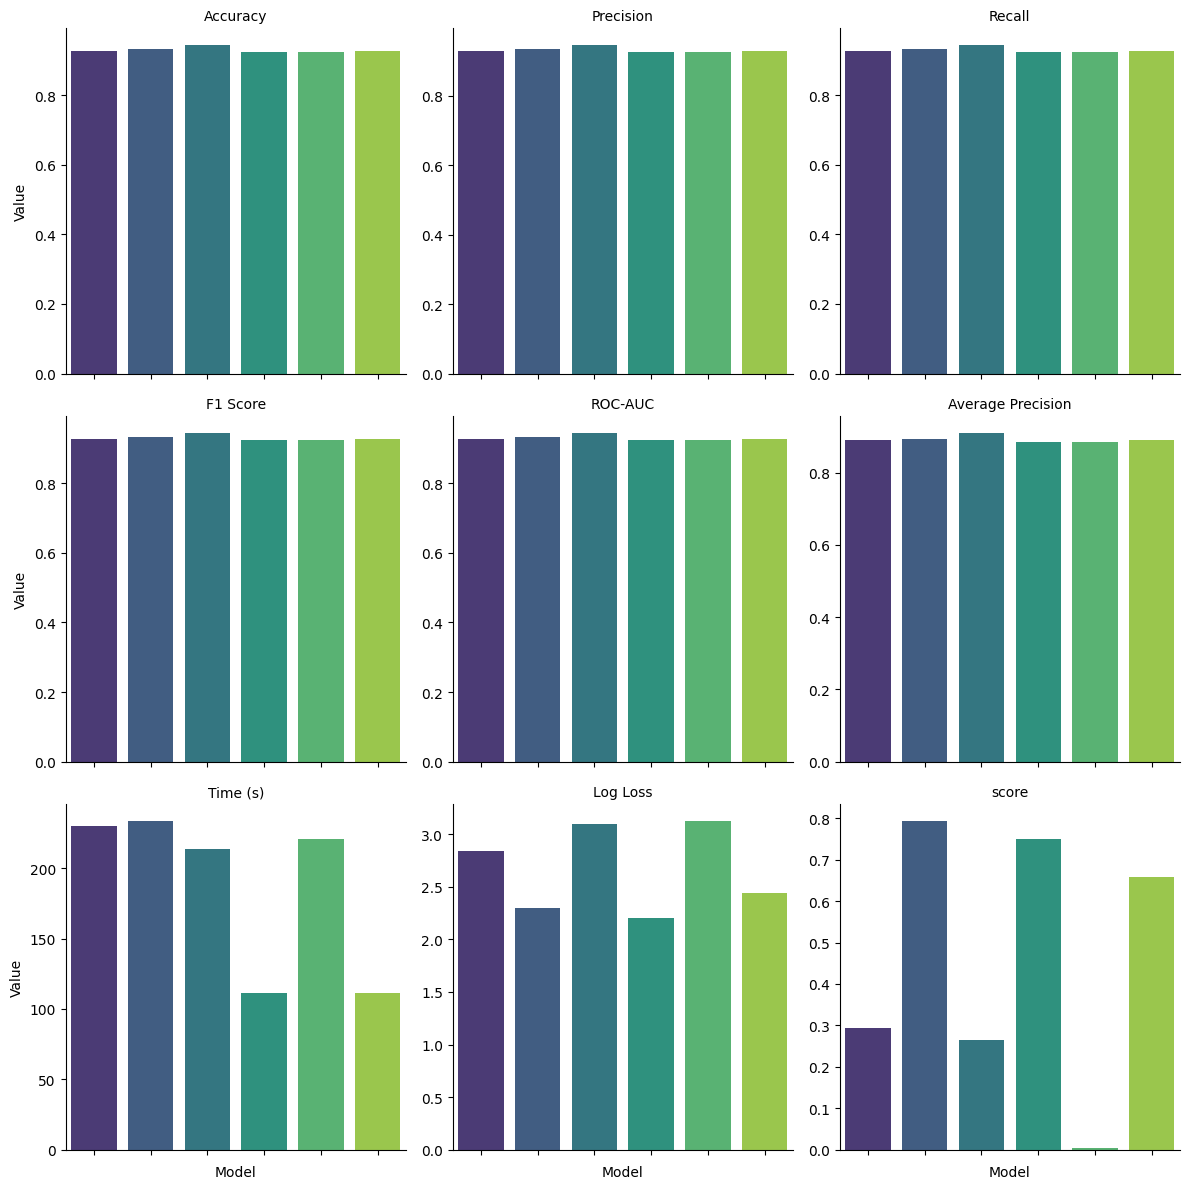

In [19]:
df_melted = pd.melt(newDF, id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC',
                                                       'Average Precision', 'Time (s)', 'Log Loss' ,'score'])

# Plot using Seaborn facet grid
g = sns.FacetGrid(df_melted, col="variable", col_wrap=3, height=4, sharey=False)
g.map(sns.barplot, "Model", "value", palette='viridis')
g.set_axis_labels("Model", "Value")
g.set_xticklabels(rotation=45, ha='right')
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.savefig('Images/CommpAll.png')
plt.show()

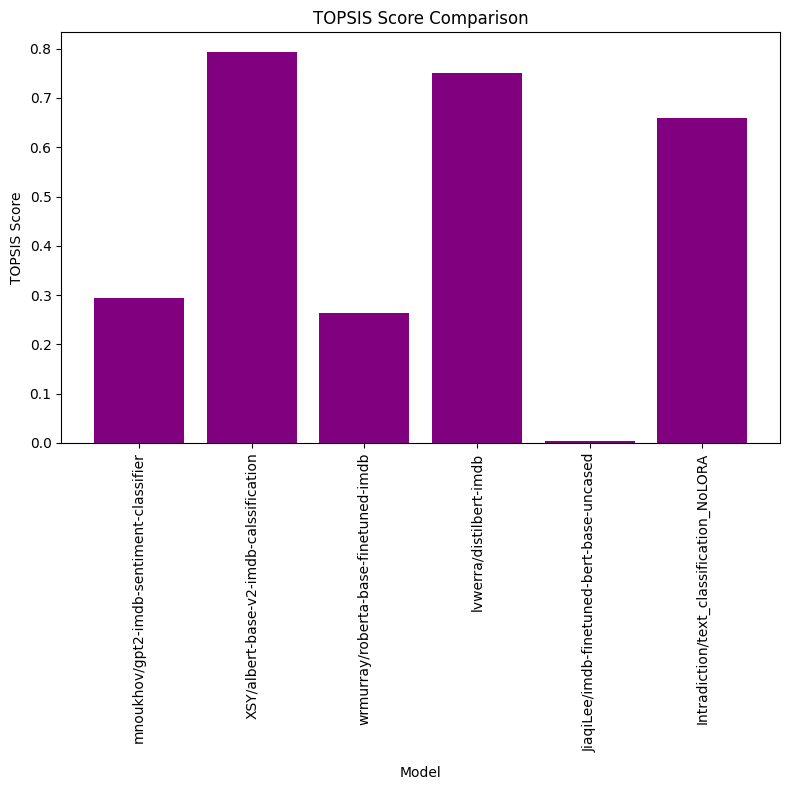

In [16]:
plt.figure(figsize=(8,8))
plt.bar(newDF.Model,newDF.score,color = 'purple')
plt.xlabel('Model',labelpad=10)
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Score Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Images/Score_comparison.png')
plt.show()